**Import libraries**

In [1]:
import os
from IPython.display import display, clear_output
from time import *
from func_cif import *
from func_hkl import *
import matplotlib.pyplot as plt

**File management**

In [2]:
# Here enters the mode of calculation
# We have throughly compute "1", & data check "2"
cal_mode = "draw_xrd"

# Here enters the folder of you CIF files. (NO slash on left)
# in_dir = 'Complex'
in_dir = 'archive_cif/cod_archive/4'
# Here enters the folder of your output files.
out_dir = 'archive_xrd/4'


# Calculate hkl planes based on wanted accurracy
hkl_max = 10
# Use script func_hkl to generate hkl matrix
print("Generating hkl matrix")
hkl_info = hkl(hkl_max)
print("hkl_info done!") # This print is usually ignored

# Create log file if not
cal_log = open("archive_log/error_log_{}_mode_{}.txt".format(in_dir.replace("/", "_"), cal_mode), "a")
cal_log.close()

Generating hkl matrix
Generating hkl_info
hkl_info done!


pattern2 3.232


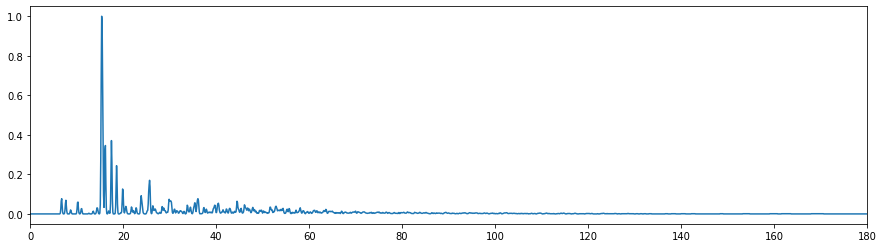

Writing output
Result of  4075999.cif :  GOOD! ,  Good! logged 
 Time cost:  6.331 
Progress:  38956 / 157980
Calculating archive_cif/cod_archive/4\07\60: 4076000.cif
1/5 Done: ATOM


In [ ]:
# Find current working directory
cwdir = os.getcwd()
# Count availble CIF files
cif_count = 0
for path, dirs, files in os.walk(in_dir):
    for file in files:
        if file.endswith('.cif'):
            cif_count += 1

# Calculate XRD and show progress
x_min = 0
x_max = 180
cif_cal_count = 0
cif_fail_count = 0
for path, dirs, files in os.walk(in_dir):
    for file in files:
        if file.endswith('.cif'):
            # Write a log file
            print("Calculating " + path + ": " + file,)
            # Here combines cwd and subdirectory
            full_dir = "{}/{}".format(cwdir, path)
            # Here record timing
            time_start = time()
            # Here calls main function to calculate XRD and output
            cif_return = cif(full_dir, file, out_dir, hkl_info, x_min, x_max, cal_mode)
            # Here record timing
            time_cost = format(time() - time_start, '.3f')
            cif_cal_count += 1
            # LOG
            if "Cancel" in cif_return:
                print("Result of ", file, ": ", cif_return, "\n", "Progress: ", str(cif_cal_count), "/", str(cif_count))
            if "GOOD" in cif_return:
                cal_log = open("archive_log/error_log_{}_mode_{}.txt".format(in_dir.replace("/", "_"), cal_mode), "a+")
                print(file+" "+cif_return+" "+str(time_cost), file=cal_log)
                print("Result of ", file, ": ", cif_return, ", ", "Good! logged", "\n", 
                      'Time cost: ', time_cost, '\n'
                      "Progress: ", str(cif_cal_count), "/", str(cif_count))
                cal_log.close()
            if "Fail" in cif_return:
                error_judge = False
                # Examine log file
                cal_log = open("archive_log/error_log_{}_mode_{}.txt".format(in_dir.replace("/", "_"), cal_mode), "r")
                cal_log_lines = cal_log.readlines()
                for line in cal_log_lines:
                    if file in line:
                        error_judge = True
                        print("Result of ", file, ": ", cif_return, ", ", "Cancelled: log exist", "\n", "Progress: ", str(cif_cal_count), "/", str(cif_count))
                cal_log.close()
                # If not found, log this new fail
                if error_judge == False:
                    cal_log = open("archive_log/error_log_{}_mode_{}.txt".format(in_dir.replace("/", "_"), cal_mode), "a+")
                    print(file+" "+cif_return, file=cal_log)
                    print("Result of ", file, ": ", cif_return, ", ", "Failed! logged", "\n", "Progress: ", str(cif_cal_count), "/", str(cif_count))
                    cal_log.close()
                cif_fail_count += 1
            
print("Pipeline complete! Total Fail: ", cif_fail_count, "/", cif_count)